<p aling='center'>
  <img src="https://github.com/danilosl/Learning-CG/blob/main/img/UFPA.png?raw=true" alt="UFPA" width=100/>
  <img src="https://github.com/danilosl/Learning-CG/blob/main/img/ENGC.png?raw=true" alt="ENGC" width=100/>
  <p><b>SERVIÇO PÚBLICO FEDERAL<br>
  MINISTERIO DA EDUCAÇÃO<br>
  UNIVERSIDADE FEDERAL DO PARÁ<br>
  CAMPUS TUCURUÍ<br>
  ENGENHARIA DA COMPUTAÇÃO</b><br>
</p>

---
> <b>Disciplina</b>: Tópicos Especiais em Computadores I - Ciência de Dados<br>
> <b>Professor</b>: Dr. Adam Dreyton Ferreira dos Santos<br>
> **Alunos**: Brendo de Araújo Rodrigues<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Danilo de Sousa Lopes<br>
> **Matrícula**: 201833840014<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;201833840019<br>
> <b>Data</b>: 11/12/2022<br>
> <b>Projeto 4</b>: Análise do consumo de cerveja em São Paulo através da
Regressão Linear</br>


# **Setup**

In [ ]:
from google.colab import drive
# montagem do drive
drive.mount('/content/drive')

# download dos datasets
!wget -q https://github.com/danilosl/Learning-DataScience/raw/main/Projeto4/Dataset/consumo_cerveja_saopaulo.csv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Mounted at /content/drive


# **Pré-Processamento**
>*   Transformação dos Dados
>*   Criação/Exclusão de Variáveis
>*   Tratamento dos Tipos de Dados

In [ ]:
# carregando a base de dados
dados = pd.read_csv("/content/consumo_cerveja_saopaulo.csv")

In [ ]:
# analisando os 10 primeiros elementos do conjunto de dados
dados.head(10)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
5,2015-01-06,"23,78","20,1","30,5","12,2",0.0,28.218
6,2015-01-07,24,"19,5","33,7",0,0.0,29.732
7,2015-01-08,"24,9","19,5","32,8","48,6",0.0,28.397
8,2015-01-09,"28,2","21,9",34,"4,4",0.0,24.886
9,2015-01-10,"26,76","22,1","34,2",0,1.0,37.937


In [ ]:
# analisando os 10 últimos elementos do conjunto de dados
dados.tail(10)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# obtendo as informações iniciais da base de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [ ]:
# obtendo a descrição da base de dados
dados.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


>**Note que na descrição da base de dados apenas as colunas com valores do tipo float foram consideradas, é necessário realizarmos um tratamento dos tipos de dados das demais colunas.**

In [ ]:
# alterando os rótulos das colunas
dados.columns = ['data','temperatura_media','temperatura_minima','temperatura_maxima','precipitacao','fim_de_semana','consumo_de_cerveja']

In [ ]:
# verificando se há dados não númericos (Not a Number - NaN)
dados.isna().sum()

data                  576
temperatura_media     576
temperatura_minima    576
temperatura_maxima    576
precipitacao          576
fim_de_semana         576
consumo_de_cerveja    576
dtype: int64

In [ ]:
# removendo apenas as linhas com todos os valores não númericos
dados.dropna(axis=0,how="all",inplace=True)

In [ ]:
# verificando se ainda há dados não númericos
dados.isna().sum()

data                  0
temperatura_media     0
temperatura_minima    0
temperatura_maxima    0
precipitacao          0
fim_de_semana         0
consumo_de_cerveja    0
dtype: int64

In [ ]:
# verificando se há dados nulos
dados.isnull().sum()

data                  0
temperatura_media     0
temperatura_minima    0
temperatura_maxima    0
precipitacao          0
fim_de_semana         0
consumo_de_cerveja    0
dtype: int64

##**Tratamento dos Tipos de Dados**

In [ ]:
# convertendo o tipo de dados da coluna data
dados['data'] = pd.to_datetime(dados['data'])
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   data                365 non-null    datetime64[ns]
 1   temperatura_media   365 non-null    object        
 2   temperatura_minima  365 non-null    object        
 3   temperatura_maxima  365 non-null    object        
 4   precipitacao        365 non-null    object        
 5   fim_de_semana       365 non-null    float64       
 6   consumo_de_cerveja  365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 22.8+ KB


In [ ]:
# função para alterar os dados para o tipo float
def altera_tipo_para_float(nome_coluna):
  dados[nome_coluna] = dados[nome_coluna].str.replace(',', '.')
  dados[nome_coluna] = dados[nome_coluna].astype(float)

In [ ]:
# alterando os dados do tipo object para float
altera_tipo_para_float('temperatura_media')
altera_tipo_para_float('temperatura_minima')
altera_tipo_para_float('temperatura_maxima')
altera_tipo_para_float('precipitacao')

In [ ]:
# verificando as alterações dos tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   data                365 non-null    datetime64[ns]
 1   temperatura_media   365 non-null    float64       
 2   temperatura_minima  365 non-null    float64       
 3   temperatura_maxima  365 non-null    float64       
 4   precipitacao        365 non-null    float64       
 5   fim_de_semana       365 non-null    float64       
 6   consumo_de_cerveja  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.8 KB


In [ ]:
# obtendo a descrição da base de dados
dados.describe()

,temperatura_media,temperatura_minima,temperatura_maxima,precipitacao,fim_de_semana,consumo_de_cerveja
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


In [ ]:
# criando a coluna mês
dados['mes'] = dados['data'].dt.strftime('%m')

In [ ]:
# criando a coluna dia
dados['dia'] = dados['data'].dt.day_name()

In [ ]:
# alterando os rótulos dos meses
mes = {
    '01' : 'Janeiro',
    '02' : 'Fevereiro',
    '03' : 'Março',
    '04' : 'Abril', 
    '05' : 'Maio', 
    '06' : 'Junho',
    '07' : 'Julho',
    '08' : 'Agosto',
    '09' : 'Setembro',
    '10' : 'Outubro',
    '11' : 'Novembro',
    '12' : 'Dezembro'
}
dados.mes = dados.mes.map(mes)

In [ ]:
# alterando os rótulos dos meses
dia = {
    'Monday' : 'Segunda',
    'Tuesday' : 'Terça',
    'Wednesday' : 'Quarta',
    'Thursday' : 'Quinta', 
    'Friday' : 'Sexta', 
    'Saturday' : 'Sábado',
    'Sunday' : 'Domingo'
}
dados.dia = dados.dia.map(dia)

In [ ]:
# deve ser retirado o "." da coluna: "consumo_de_cerveja" em mil
def trata_consumo(consumo_dia:float):
  consumo_dia = format(consumo_dia,'.3f').replace(".","")
  return float(consumo_dia)

dados['consumo_de_cerveja'] = dados['consumo_de_cerveja'].apply(trata_consumo)

In [ ]:
# analise final do conjunto de dados pré-processado
dados

,data,temperatura_media,temperatura_minima,temperatura_maxima,precipitacao,fim_de_semana,consumo_de_cerveja,mes,dia
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461.0,Janeiro,Quinta
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972.0,Janeiro,Sexta
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814.0,Janeiro,Sábado
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799.0,Janeiro,Domingo
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900.0,Janeiro,Segunda
...,...,...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32307.0,Dezembro,Domingo
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26095.0,Dezembro,Segunda
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22309.0,Dezembro,Terça
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20467.0,Dezembro,Quarta


# **Análise Exploratória dos Dados**

In [ ]:
# separando os dados em grupos por dia da semana
group_dia_semana = dados.groupby('dia')['consumo_de_cerveja'].sum()

# ordenando os dados
group_dia_semana.sort_values(ascending=False, inplace=True) 
group_dia_semana

dia
Domingo    1508391.0
Sábado     1499572.0
Quinta     1276057.0
Terça      1266468.0
Sexta      1255170.0
Quarta     1238140.0
Segunda    1227701.0
Name: consumo_de_cerveja, dtype: float64

[Text(0, 0, 'Domingo'),
 Text(0, 0, 'Sábado'),
 Text(0, 0, 'Quinta'),
 Text(0, 0, 'Terça'),
 Text(0, 0, 'Sexta'),
 Text(0, 0, 'Quarta'),
 Text(0, 0, 'Segunda')]

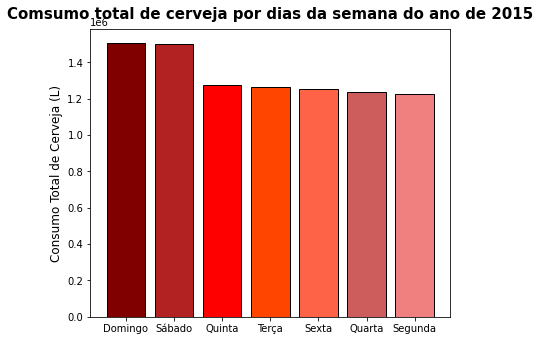

In [ ]:
# criando uma lista de cores para usar na geração dos gráficos
cores = ['maroon','firebrick','red','orangered','tomato','indianred','lightcoral','salmon','coral','lightsalmon','lightpink','mistyrose']

# criando um gráfico de barras para relacionar o consumo de cerveja durante os dias úteis da semana e fins de semana
fig = plt. figure(figsize=(5,4))
eixo = fig.add_axes([0, 0, 1, 1])

indice = range(len(group_dia_semana))

eixo.bar(indice, group_dia_semana, color = cores, edgecolor='k')
eixo.set_title('Comsumo total de cerveja por dias da semana do ano de 2015', fontsize=15, pad=10, weight='bold')
eixo.set_ylabel('Consumo Total de Cerveja (L)', fontsize=12)
eixo.set_xticks(indice)
eixo.set_xticklabels(group_dia_semana.index)

In [ ]:
# separando os dados em grupos de meses
group_mes = dados.groupby('mes')['consumo_de_cerveja'].sum()

# ordenando os dados
group_mes = group_mes[mes.values()]
group_mes

mes
Janeiro      889007.0
Fevereiro    718848.0
Março        776128.0
Abril        738723.0
Maio         706750.0
Junho        708812.0
Julho        699759.0
Agosto       803178.0
Setembro     755944.0
Outubro      857249.0
Novembro     774846.0
Dezembro     842255.0
Name: consumo_de_cerveja, dtype: float64

[Text(0, 0, 'Janeiro'),
 Text(0, 0, 'Fevereiro'),
 Text(0, 0, 'Março'),
 Text(0, 0, 'Abril'),
 Text(0, 0, 'Maio'),
 Text(0, 0, 'Junho'),
 Text(0, 0, 'Julho'),
 Text(0, 0, 'Agosto'),
 Text(0, 0, 'Setembro'),
 Text(0, 0, 'Outubro'),
 Text(0, 0, 'Novembro'),
 Text(0, 0, 'Dezembro')]

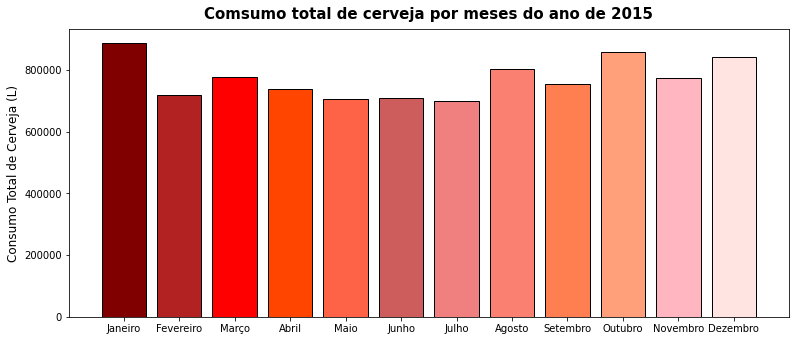

In [ ]:
# criando um gráfico de barras para relacionar o consumo de cerveja total durante os meses
fig = plt. figure(figsize=(10,4))
eixo = fig.add_axes([0, 0, 1, 1])

indice = range(len(group_mes))

eixo.bar(indice, group_mes, color = cores, edgecolor='k')
eixo.set_title('Comsumo total de cerveja por meses do ano de 2015', fontsize=15, pad=10, weight='bold')
eixo.set_ylabel('Consumo Total de Cerveja (L)', fontsize=12)
eixo.set_xticks(indice)
eixo.set_xticklabels(group_mes.index)

##**Matriz de Correlação**
>Aplicando a Matriz de Correlação para analisar a associação linear entre duas variáveis. Sendo que:
>*   -1: Indica que uma variável aumenta e outra diminui
>*   +1: Indica que uma variável aumenta e outra aumenta

In [ ]:
dados.corr().round(3)

,temperatura_media,temperatura_minima,temperatura_maxima,precipitacao,fim_de_semana,consumo_de_cerveja
temperatura_media,1.000,0.863,0.923,0.024,-0.051,0.575
temperatura_minima,0.863,1.000,0.673,0.099,-0.060,0.393
temperatura_maxima,0.923,0.673,1.000,-0.049,-0.040,0.643
precipitacao,0.024,0.099,-0.049,1.000,0.002,-0.194
fim_de_semana,-0.051,-0.060,-0.040,0.002,1.000,0.506
consumo_de_cerveja,0.575,0.393,0.643,-0.194,0.506,1.000


Text(0.5, 1.0, 'Heatmap da Correlação das Variáveis')

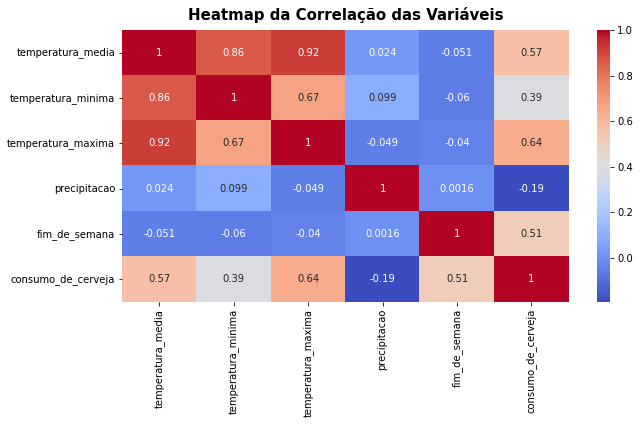

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(dados.corr(), annot = True, cmap='coolwarm')
plt.title('Heatmap da Correlação das Variáveis', fontsize=15, pad=10, weight='bold')

# **Aprendizado de Máquina - Regressão Linear**
>Em uma análise de Regressão Linear devemos explorar duas variáveis:
>*   Variável Dependente
>*   Variáveis Explicativas

##**Variável Dependente (y)**
>Ánalise da variável dependente (y): "consumo_cerveja"

Text(0, 0.5, 'Litros')

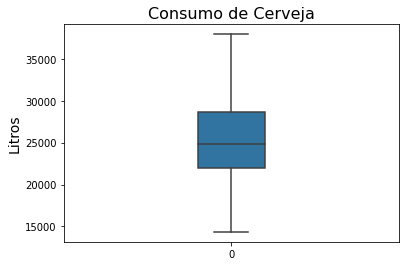

In [ ]:
ax = sns.boxplot(data=dados['consumo_de_cerveja'],width=0.2,orient="v")
ax.set_title("Consumo de Cerveja", fontsize=16)
ax.set_ylabel("Litros", fontsize=14)

>**Ao analisar o Boxplot de consumo de cerveja, é visível que não há outliers, sendo assim, podemos concluir que nossos dados estão adequados para as próximas etapas.**

##**Análise da Relação entre Variáveis Explicativas e Variável Dependente**   
>*   Variável Dependente = consumo_de_cerveja
>*   Variáveis Explicativas = temperatura_minima, temperatura_media,  temperatura_maxima, fim_de_semana, precipitacao


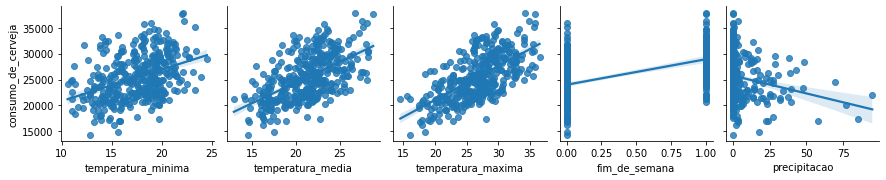

In [ ]:
ax = sns.pairplot(dados, y_vars="consumo_de_cerveja",x_vars=["temperatura_minima","temperatura_media","temperatura_maxima","fim_de_semana","precipitacao"], kind='reg')

##**Regressão Linear**   


In [ ]:
# criando uma Series para armazenar a variável dependente (Consumo de Cerveja)
y = dados['consumo_de_cerveja']

In [ ]:
# criando um DataFrame para armazenar as variáveis explicativas (Temperatura Máxima, Fim de Semana, Precipitacao)
X = dados[['temperatura_maxima','precipitacao','fim_de_semana']]

In [ ]:
# separando datasets de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2307, test_size=0.3)

In [ ]:
# instanciando o modelo de Regressão Linear
modelo_regressao = LinearRegression()

In [ ]:
# ajustando o nosso modelo aos dados de Treino
modelo_regressao.fit(X_train, y_train)

LinearRegression()

In [ ]:
# obtendo o coeficiente de determinação (R²), que explica o quanto nossa linha de regressão do modelo se ajustou aos dados.
modelo_regressao.score(X_train,y_train).round(2)

0.74

>**Através do modelo obtido, vamos gerar uma previsão para a variável dependente seguindo modelo de teste das variáveis explicativas**

In [ ]:
previsao_y_consumo = modelo_regressao.predict(X_test).round(2)
previsao_y_consumo

array([23526.97, 16922.65, 20437.63, 25284.89, 27377.42, 25710.35,
       21280.68, 18852.7 , 23373.7 , 29933.58, 30549.06, 28113.73,
       29446.01, 25124.39, 27072.31, 20771.27, 34782.  , 24775.  ,
       23542.57, 29007.44, 27777.8 , 22400.14, 28049.3 , 25775.93,
       24174.44, 24799.57, 29266.3 , 25041.92, 29600.6 , 22572.95,
       20170.71, 23162.2 , 24574.81, 28645.27, 32869.65, 21371.83,
       20904.73, 30140.68, 24241.17, 26643.41, 31334.89, 27331.16,
       26886.03, 31077.16, 22874.95, 24708.27, 24295.93, 21170.47,
       27844.52, 25108.64, 29266.3 , 21638.75, 23664.22, 30267.23,
       28244.9 , 29593.74, 20680.61, 20370.9 , 20681.26, 24508.09,
       29599.94, 27510.88, 26042.85, 35538.8 , 26962.29, 27545.61,
       23640.61, 23907.53, 20170.71, 31468.35, 20395.99, 22575.41,
       30734.33, 25442.29, 29333.03, 24584.65, 23284.18, 19877.57,
       19946.59, 26776.86, 24107.71, 29112.37, 25308.83, 28178.17,
       23640.61, 21920.09, 17969.81, 29708.97, 24374.63, 25308

>**Obtendo o Intercepto do Modelo (Representa o consumo médio de cerveja sem considerar o efeito das variáveis explicativas). Ou seja, é a nossa constante da equação.**

In [ ]:
modelo_regressao.intercept_.round(2)

6424.59

In [ ]:
# obtendo os coeficientes de regressão
modelo_regressao.coef_.round(2)

array([ 667.29,  -65.58, 5358.77])

##**Coeficientes do Modelo**

In [ ]:
index=['Temperatura Máxima','Chuva (mm)','Final de Semana', 'Intercepto']
pd.DataFrame(data = np.append(modelo_regressao.coef_, modelo_regressao.intercept_).round(2), index = index, columns = ['Parâmetros'])

,Parâmetros
Temperatura Máxima,667.29
Chuva (mm),-65.58
Final de Semana,5358.77
Intercepto,6424.59


##**Gráfico de Dispersão entre valor estimado de consumo x valor real de consumo**

In [ ]:
y_previsto_train = modelo_regressao.predict(X_train)
fig = px.scatter(x=y_previsto_train, y=y_train, trendline='ols', trendline_color_override='green', width=700, height=400)
fig.update_layout(title='Previsão Consumo X Real Consumo', title_x = 0.5,
                   xaxis_title='Consumo de Cerveja em litros - Previsão',
                   yaxis_title='Consumo de Cerveja em litros - Real')
fig.show()

##**Obtendo os Resíduos X Previsão**

In [ ]:
residuo = y_train - y_previsto_train
fig = px.scatter(x=y_previsto_train, y=residuo,trendline='ols',trendline_color_override='green', width=700, height=400)

fig.update_layout(title='Resíduos x Previsão', title_x = 0.5,
                   xaxis_title='Consumo de Cerveja (litros)',
                   yaxis_title='Resíduo')

fig.show()

##**Comparando Modelos**

In [ ]:
X2 = dados[['temperatura_media','precipitacao','fim_de_semana']]

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2307)

In [ ]:
modelo2 = LinearRegression()

In [ ]:
modelo2.fit(X2_train, y2_train)

LinearRegression()

In [ ]:
print('Coeficiente de Determinação com Temperatura Média')
print('R² = {}'.format(modelo2.score(X2_train, y2_train).round(2)))

Coeficiente de Determinação com Temperatura Média
R² = 0.68


In [ ]:
print('Coeficiente de Determinação com Temperatura Máxima')
print('R² = {}'.format(modelo_regressao.score(X_train,y_train).round(2)))

Coeficiente de Determinação com Temperatura Máxima
R² = 0.74
